In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def load_data(file_path):
    try:
        # Chargement des données avec gestion des lignes problématiques
        data = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip')
        return data
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return None

# Charger les données
data_path = r'C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/nlp/dataset/text/text_intention_detector.csv'
data = load_data(data_path)
data.head() if data is not None else print("Failed to load data.")

,sentence,is_correct,is_not_trip,is_unknown
0,Y a-t-il un moyen d'aller de Montreux-Vieux à ...,1,0,0
1,I would like to travel from culoz to buswiller...,0,0,0
2,He lied when he said he didn't like her.,0,1,0
3,?N|ajOLIY6;DOM'mKavLZZnkAi,0,0,1
4,a(c}sMyu7/97.[-IA@m k0rN0U,0,0,1


In [9]:
def preprocess_data(data):
    try:
        # Renommer les colonnes pour simplifier les analyses
        data.columns = ['sentence', 'is_correct', 'is_not_trip', 'is_unknown']
        
        # Convertir les colonnes en type int si ce n'est pas déjà fait
        data['is_correct'] = data['is_correct'].astype(int)
        data['is_not_trip'] = data['is_not_trip'].astype(int)
        data['is_unknown'] = data['is_unknown'].astype(int)
        
        # Ajouter une colonne pour la classification principale
        data['classification'] = data.apply(
            lambda row: 'Correct' if row['is_correct'] == 1 else 'Not Trip' if row['is_not_trip'] == 1 else 'Unknown',
            axis=1
        )
        
        return data
    except Exception as e:
        print(f"Error processing the data: {e}")
        return None

# Prétraitement des données
if data is not None:
    data = preprocess_data(data)
    data.head()

C:\Users\vikne\AppData\Local\Temp\ipykernel_7724\3445364678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=data, palette='muted')


Répartition des Classifications dans le Dataset:
Unknown: 516005 phrases
Correct: 393753 phrases
Not Trip: 391987 phrases


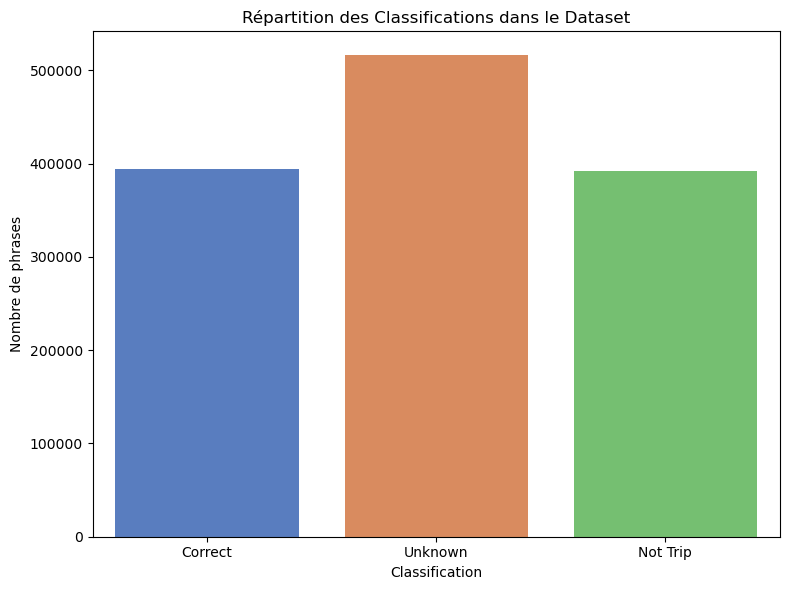

In [ ]:
def plot_classification_distribution(data):
    try:
        # Distribution des classifications dans le dataset
        plt.figure(figsize=(8, 6))
        sns.countplot(x='classification', data=data, palette='muted')
        plt.title("Répartition des Classifications dans le Dataset")
        plt.xlabel("Classification")
        plt.ylabel("Nombre de phrases")
        
        # Afficher les résultats en texte
        print("Répartition des Classifications dans le Dataset:")
        classification_counts = data['classification'].value_counts()
        for classification, count in classification_counts.items():
            print(f"{classification}: {count} phrases")
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting classification distribution: {e}")

# Tracer la répartition des classifications
if data is not None:
    plot_classification_distribution(data)


Statistiques sur la longueur des phrases :
- Longueur moyenne : 8.5 mots
- Longueur minimale : 1 mots
- Longueur maximale : 244 mots
- Longueur médiane : 8.0 mots


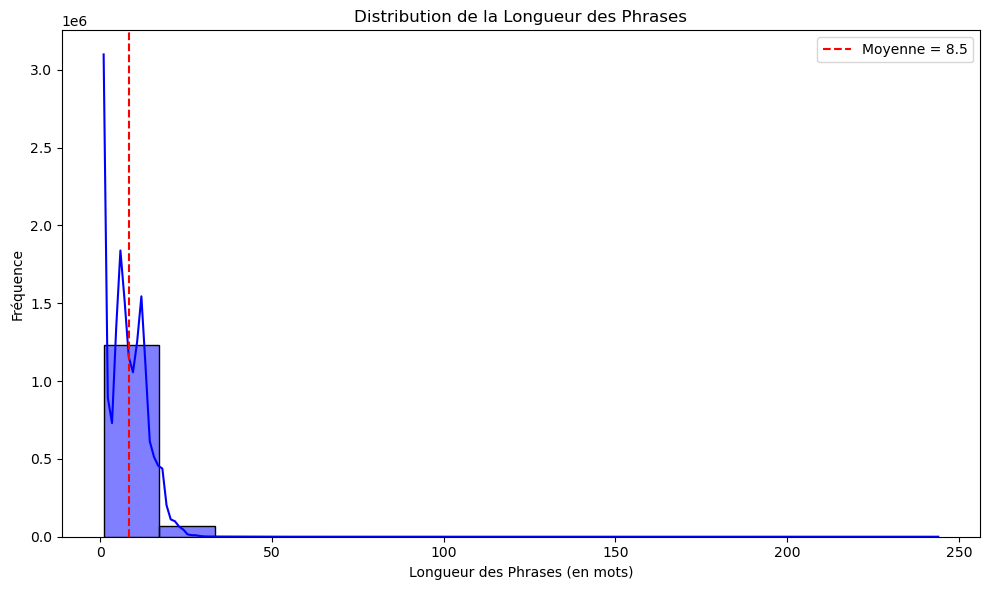

In [11]:
def plot_sentence_length_distribution(data):
    try:
        # Calculer la longueur de chaque phrase
        data['sentence_length'] = data['sentence'].apply(lambda x: len(x.split()))
        
        # Statistiques de longueur des phrases
        avg_length = data['sentence_length'].mean()
        min_length = data['sentence_length'].min()
        max_length = data['sentence_length'].max()
        median_length = data['sentence_length'].median()
        
        print("Statistiques sur la longueur des phrases :")
        print(f"- Longueur moyenne : {avg_length:.1f} mots")
        print(f"- Longueur minimale : {min_length} mots")
        print(f"- Longueur maximale : {max_length} mots")
        print(f"- Longueur médiane : {median_length:.1f} mots")
        
        # Tracer l'histogramme des longueurs des phrases
        plt.figure(figsize=(10, 6))
        sns.histplot(data['sentence_length'], bins=15, kde=True, color='blue')
        plt.title("Distribution de la Longueur des Phrases")
        plt.xlabel("Longueur des Phrases (en mots)")
        plt.ylabel("Fréquence")
        
        plt.axvline(avg_length, color='red', linestyle='--', label=f'Moyenne = {avg_length:.1f}')
        plt.legend()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting sentence length distribution: {e}")

# Tracer la distribution des longueurs de phrases
if data is not None:
    plot_sentence_length_distribution(data)

C:\Users\vikne\AppData\Local\Temp\ipykernel_7724\2996547354.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='sentence_length', data=data, palette='Set2')


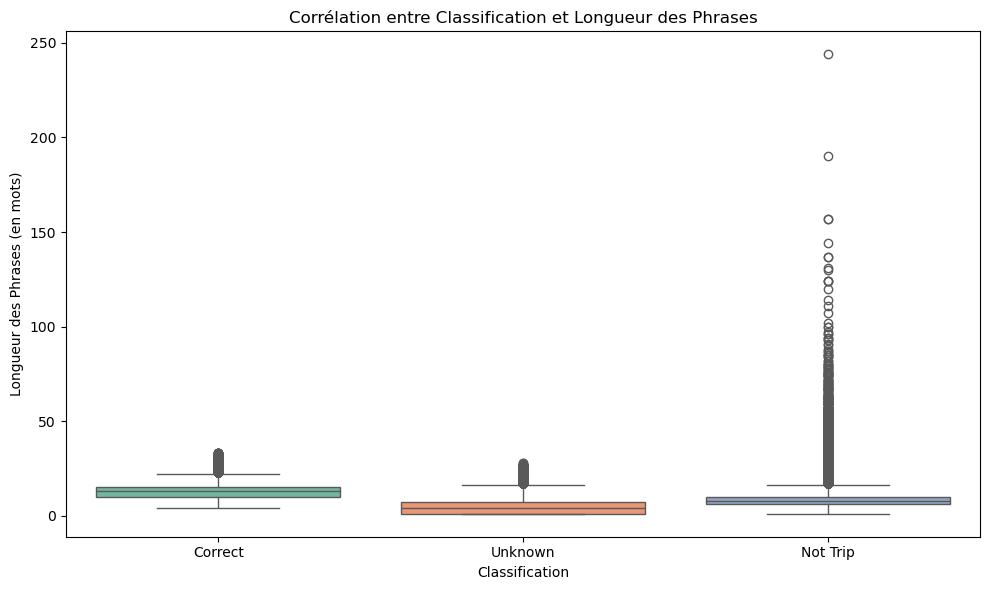


Statistiques pour les phrases 'Correct' :
count    393753.000000
mean         12.950494
std           4.054828
min           4.000000
25%          10.000000
50%          13.000000
75%          15.000000
max          33.000000
Name: sentence_length, dtype: float64

Statistiques pour les phrases 'Unknown' :
count    516005.000000
mean          5.243658
std           4.859097
min           1.000000
25%           1.000000
50%           4.000000
75%           7.000000
max          28.000000
Name: sentence_length, dtype: float64

Statistiques pour les phrases 'Not Trip' :
count    391987.000000
mean          8.203629
std           3.801551
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max         244.000000
Name: sentence_length, dtype: float64


In [12]:
def analyze_correlation(data):
    try:
        # Corrélation entre la longueur des phrases et les classifications
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='classification', y='sentence_length', data=data, palette='Set2')
        plt.title("Corrélation entre Classification et Longueur des Phrases")
        plt.xlabel("Classification")
        plt.ylabel("Longueur des Phrases (en mots)")
        plt.tight_layout()
        plt.show()
        
        # Statistiques supplémentaires par classification
        for classification in data['classification'].unique():
            stats = data[data['classification'] == classification]['sentence_length'].describe()
            print(f"\nStatistiques pour les phrases '{classification}' :")
            print(stats)
        
    except Exception as e:
        print(f"Error analyzing correlation: {e}")

# Analyser la corrélation
if data is not None:
    analyze_correlation(data)